## Holt - Winter


*   EWMA failed to account for other contributing factors like trend and seasonality.
*   So we can try using  Double and Triple Exponential Smoothing with the Holt-Winters Methods.

*   In Double Exponential Smoothing (aka Holt's Method) we introduce a new smoothing factor  β  (beta) that addresses trend.
*   The forecasting model is simply a straight sloped line extending from the most recent data point.

*   With Triple Exponential Smoothing (aka the Holt-Winters Method) we introduce a smoothing factor  γ  (gamma) that addresses seasonality.

*   In general, higher values for  α ,  β  and  γ  (values closer to 1), place more emphasis on recent data.
*   Related Functions:

* statsmodels.tsa.holtwinters.SimpleExpSmoothing(endog)     Simple Exponential Smoothing 

* statsmodels.tsa.holtwinters.ExponentialSmoothing(endog)   Holt-Winters Exponential Smoothing


##Step1: Loading The Data

In [4]:
import pandas as pd
path="/content/drive/MyDrive/WorkSpace2/GIT/Time-Series-Analysis/Data/"

In [5]:
df=pd.read_csv(path+"airline_passengers.csv") #index_col='Month',parse_dates=True
df.head(2)

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118


In [6]:
#df.dropna(inplace=True)
df['Thousands of Passengers'].isna().sum()

0

##Step2: Setting The Index

In [7]:
"""df=pd.read_csv(path+"airline_passengers.csv",index_col='Month',parse_dates=True) #index_col='Month',parse_dates=True
df.head(2)"""
"""
import statsmodels.api as sm
#min(df['Month']),max(df['Month'])
#df.index=pd.Index(sm.tsa.datetools.dates_from_range('1949','1960'))
"""
# Parse strings to datetime type
df['Month'] = pd.to_datetime(df['Month'], infer_datetime_format=True)
df = df.set_index(['Month'])
df.head(2)

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118


##Step3: Setting a DatetimeIndex Frequency




* Note that our DatetimeIndex does not have a frequency. 
In order to build a Holt-Winters smoothing model, 
* statsmodels needs to know the frequency 
of the data (whether it's daily, monthly etc.). 
Since observations occur at the start of  each month, we'll use MS.
* A full list of time series offset aliases can be found here.
https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases




In [8]:
df.index.freq = 'MS'
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

___
##Step4 Recalling- Simple Exponential Smoothing
* A variation of the statmodels Holt-Winters function provides Simple Exponential Smoothing. 
* We'll show that it performs the same calculation of the weighted moving average as the pandas .ewm() method:\
*
Y0=X0
Yt=(1−α)Yt−1+αXt,

In [9]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span = 12
alpha = 2/(span+1)

df['EWMA12'] = df['Thousands of Passengers'].ewm(alpha=alpha,adjust=False).mean()
df['SES12']=SimpleExpSmoothing(df['Thousands of Passengers']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
df.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Thousands of Passengers,EWMA12,SES12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


##Step5: Double Exponential Smoothing

* Where Simple Exponential Smoothing employs just one smoothing factor  α  (alpha), Double Exponential Smoothing adds a second smoothing factor  β  (beta) that addresses trends in the data. 
* Like the alpha factor, values for the beta factor fall between zero and one ( 0<β≤1 ). 
* The benefit here is that the model can anticipate future increases or decreases where the level model would only work from recent calculations.

* We can also address different types of change (growth/decay) in the trend. If a time series displays a straight-line sloped trend, you would use an additive adjustment. If the time series displays an exponential (curved) trend, we would use a multiplicative adjustment.

* In forecasting, it's worth noting that both additive and multiplicative adjustments may become exaggerated over time, and require damping that reduces the size of the trend over future periods until it reaches a flat line.

In [10]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df['DESadd12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='add').fit().fittedvalues.shift(-1)
df['DESmul12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul').fit().fittedvalues.shift(-1)
df.head()

,Thousands of Passengers,EWMA12,SES12,DESadd12,DESmul12
Month,,,,,
1949-01-01,112,112.000000,112.000000,114.336233,112.049247
1949-02-01,118,112.923077,112.923077,120.336233,118.051885
1949-03-01,132,115.857988,115.857988,134.336233,132.058041
1949-04-01,129,117.879836,117.879836,131.336233,129.056722
1949-05-01,121,118.359861,118.359861,123.336233,121.053204


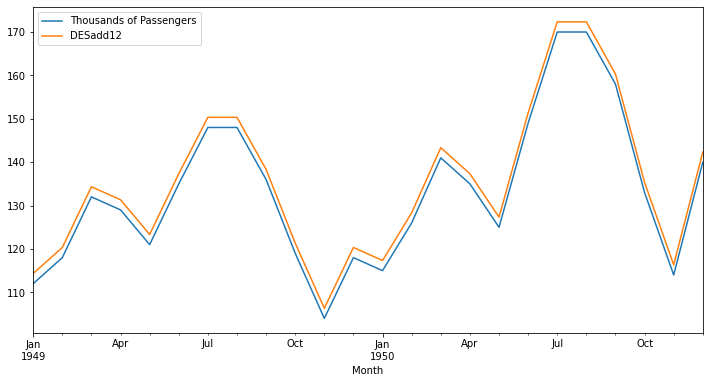

In [16]:
df[['Thousands of Passengers','DESadd12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

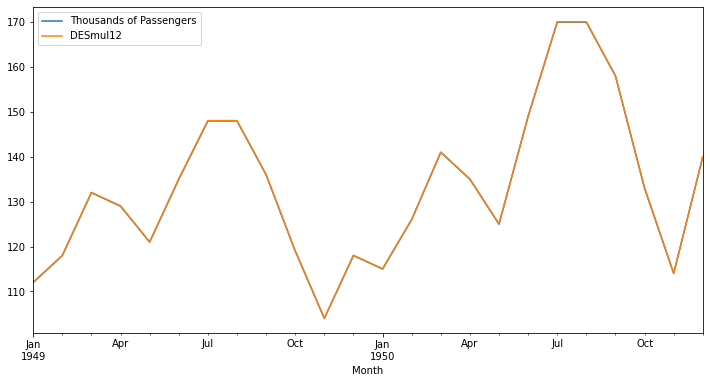

In [17]:
df[['Thousands of Passengers','DESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);



* Here we can see that Double Exponential Smoothing is a much  better representation of the time series data.
* It does appear that a multiplicative adjustment gives better results. Note that the green line almost completely overlaps the original data.




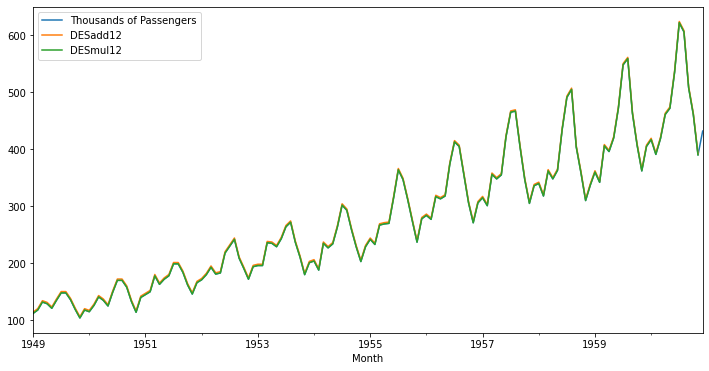

In [15]:
df[['Thousands of Passengers','DESadd12','DESmul12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

##Step6: Triple Exponential Smoothing


*   Triple Exponential Smoothing, the method most closely associated with Holt-Winters, adds support for both trends and seasonality in the data.




In [18]:
df['TESadd12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
df['TESmul12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
df.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


,Thousands of Passengers,EWMA12,SES12,DESadd12,DESmul12,TESadd12,TESmul12
Month,,,,,,,
1949-01-01,112,112.000000,112.000000,114.336233,112.049247,113.081288,111.583236
1949-02-01,118,112.923077,112.923077,120.336233,118.051885,120.550747,118.839294
1949-03-01,132,115.857988,115.857988,134.336233,132.058041,135.527329,133.327416
1949-04-01,129,117.879836,117.879836,131.336233,129.056722,133.155064,127.915388
1949-05-01,121,118.359861,118.359861,123.336233,121.053204,125.656114,120.978320


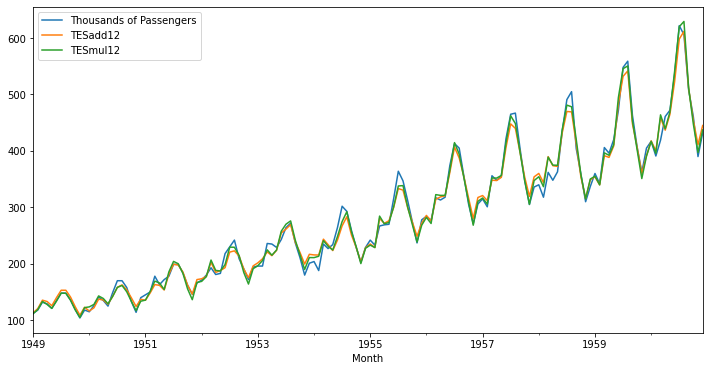

In [19]:
df[['Thousands of Passengers','TESadd12','TESmul12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

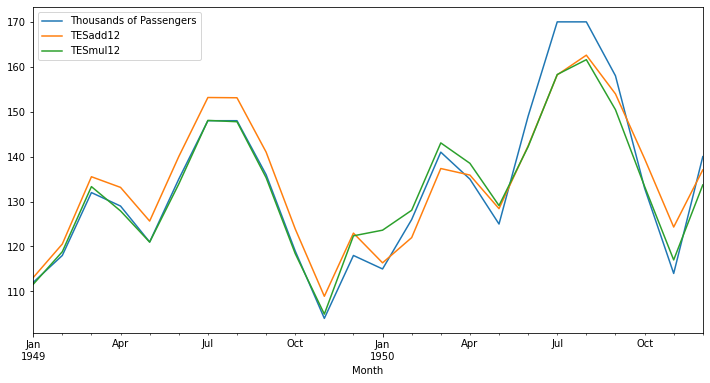

In [22]:
df[['Thousands of Passengers','TESadd12','TESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

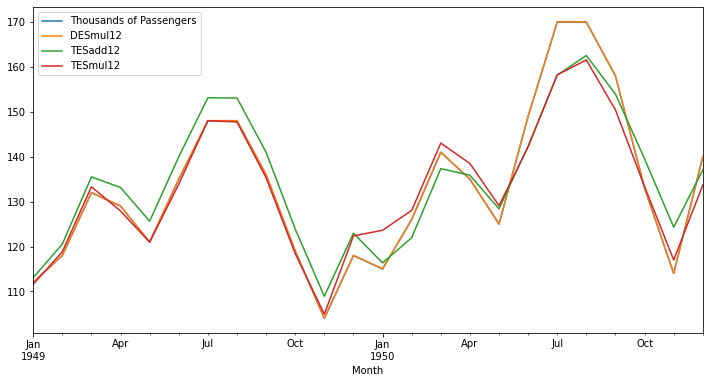

In [21]:
df[['Thousands of Passengers','DESmul12','TESadd12','TESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);



*   List item
Based on the plot above, we might think that Triple Exponential Smoothing does a poorer job of fitting than Double Exponential Smoothing.But is much useful in forecasting. 
* Having the ability to predict fluctuating seasonal patterns greatly improves our forecast.

